In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_1rxi as method
import plot_utils

In [9]:
chunk_size = 10

In [10]:
fname = method.__file__.split('/')[-1][:-3].replace('x', str(chunk_size)) + '-omni'
fname

'n_1r10i-omni'

In [11]:
import rate
rate.setkey(1,'gpt')
rate.model = 'gpt-4o'

In [12]:
source = annotate.get_clean()

In [13]:
source = source.sample(frac=1, random_state=8)

In [14]:
requests = await method.rate(source, chunk_size=chunk_size)

Request 1 of 423
Request 2 of 423
Request 3 of 423
Request 4 of 423
Request 5 of 423
Request 6 of 423
Request 7 of 423
Request 8 of 423
Request 9 of 423
Request 10 of 423
Request 11 of 423
Request 12 of 423
Request 13 of 423
Request 14 of 423
Request 15 of 423
Request 16 of 423
Request 17 of 423
Request 18 of 423
Request 19 of 423
Request 20 of 423
Request 21 of 423
Request 22 of 423
Request 23 of 423
Request 24 of 423
Request 25 of 423
Request 26 of 423
Request 27 of 423
Request 28 of 423
Request 29 of 423
Request 30 of 423
Request 31 of 423
Request 32 of 423
Request 33 of 423
Request 34 of 423
Request 35 of 423
Request 36 of 423
Request 37 of 423
Request 38 of 423
Request 39 of 423
Request 40 of 423
Request 41 of 423
Request 42 of 423
Request 43 of 423
Request 44 of 423
Request 45 of 423
Request 46 of 423
Request 47 of 423
Request 48 of 423
Request 49 of 423
Request 50 of 423
Request 51 of 423
Request 52 of 423
Request 53 of 423
Request 54 of 423
Request 55 of 423
Request 56 of 423
R

In [42]:
failed = method.process(requests)

Failed parse (chunk 3, request #417). Prompt:
'''We aim to evaluate the creativity of ideas in an Alternative Uses Tests (AUT) based on specific criteria. Please rate our ideas, given below, in terms of their Novelty, which is defined as follows:
Novelty: Rate the novelty of the idea on a scale of 1 to 100, with 1 being not novel at all and 100 being extremely novel. Consider how unique, original, or surprising the idea is, while disregarding its feasibility and value.

Proceed as follows in your evaluation. Write 3 lines for each item in the list below. On the first line, write the item number and briefly describe the idea in your own words. On the second line, consider other unconventional uses of the item, including those listed, and compare the idea to these in terms of its Novelty. Finally, on the third line, provide your numeric rating as a json object of the form {"novelty":x}. Evaluate each idea in the order provided, leaving one empty line between evaluations. Do evaluate each

In [43]:
temp = 0.1
while temp < 0.5:
    await rate.entrypoint(failed, temperature=temp)
    failed = method.process(failed)
    temp += .1

Request 1 of 1


In [44]:
source.to_excel(f'gpt-ratings/{fname}.xlsx')

In [45]:
source = pd.read_excel(f'gpt-ratings/{fname}.xlsx').set_index('Unnamed: 0')

In [46]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.6328303099007447, pvalue=1.0463044914883309e-137),
 'feasibility': SignificanceResult(statistic=0.6130423866122013, pvalue=5.119050760723514e-127),
 'value': SignificanceResult(statistic=0.310770414299441, pvalue=9.040631363336816e-29)}

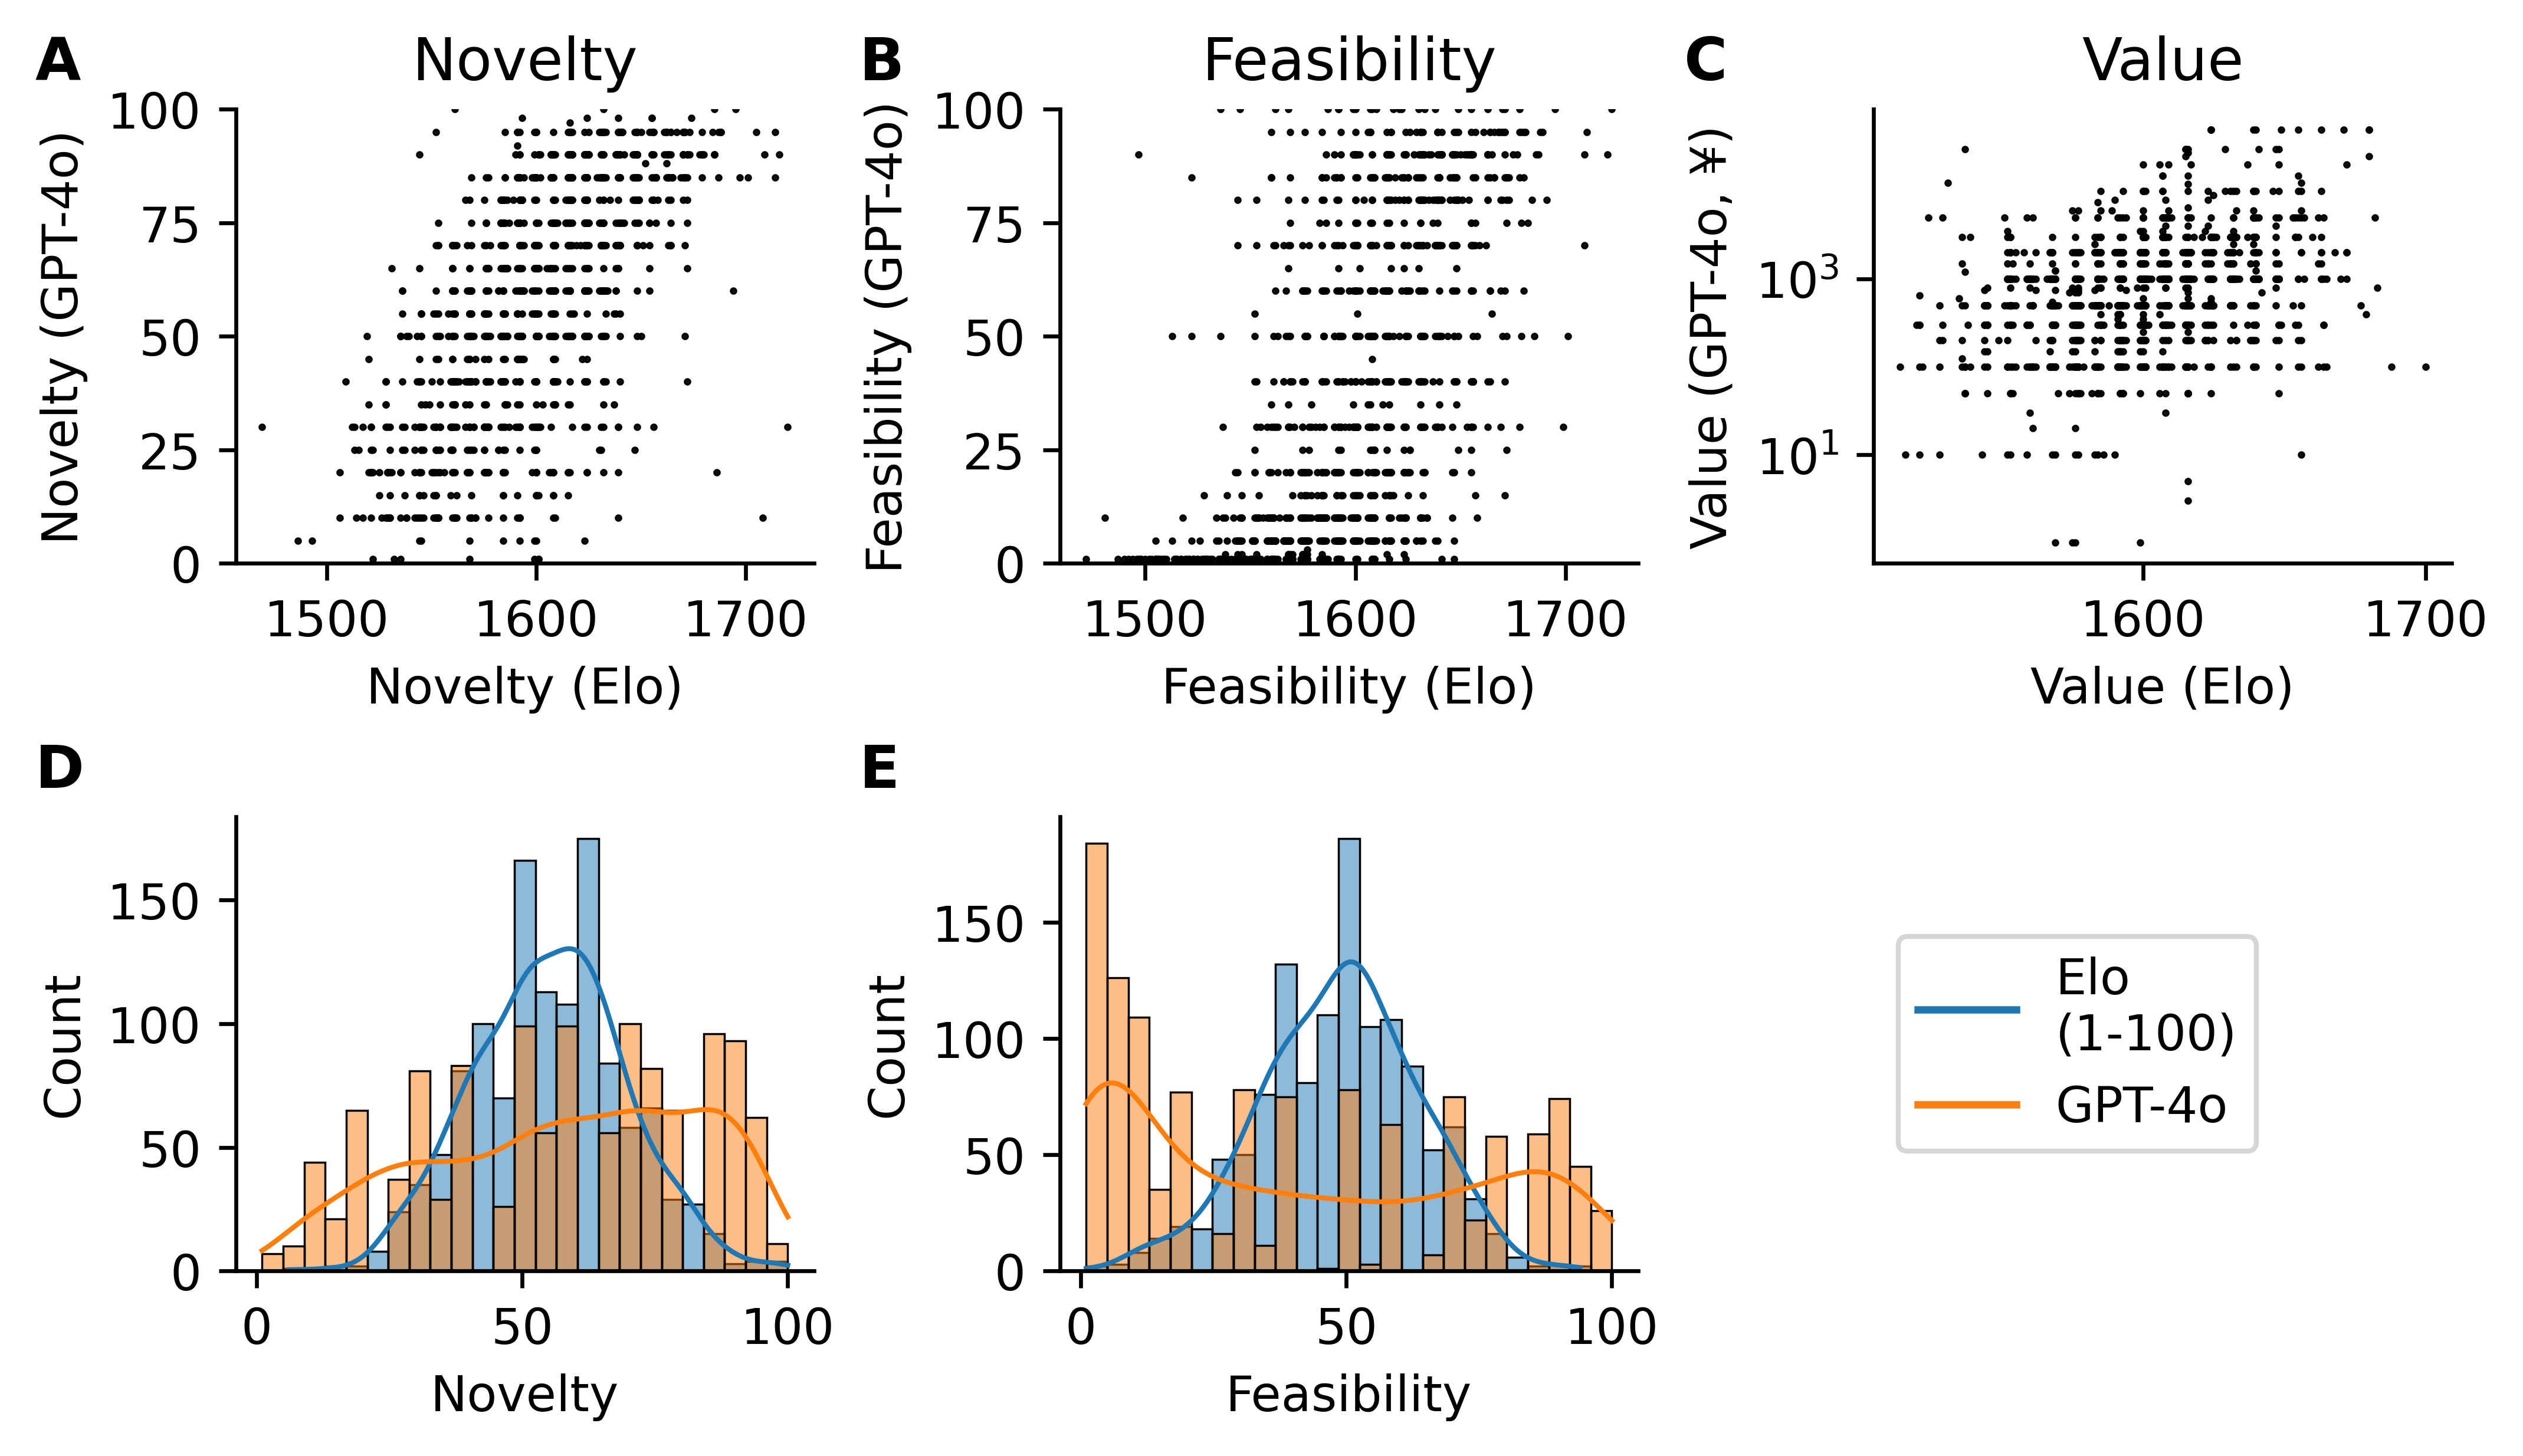

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT-4o{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT-4o')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

# plt.savefig(f'Figure_2.{fname}.pdf')

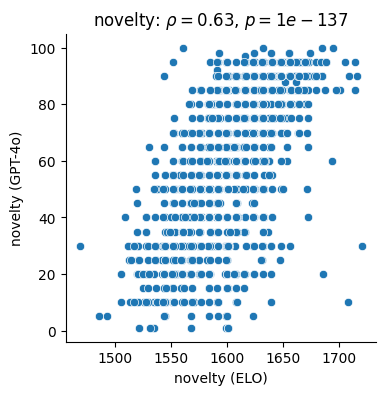

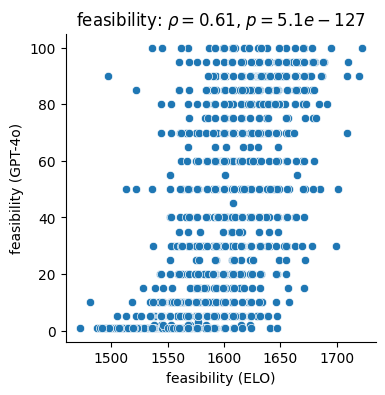

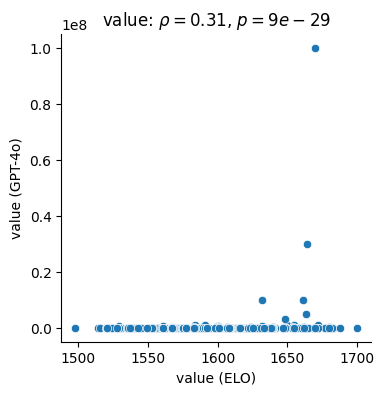

In [48]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT-4o)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

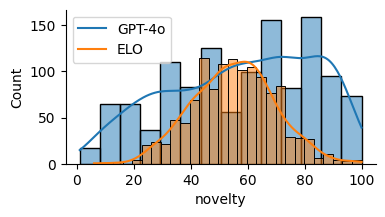

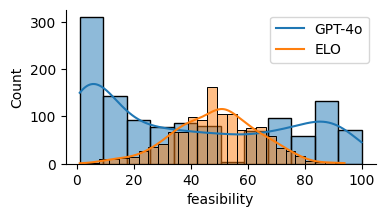

In [49]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT-4o')
    plt.plot([], label='ELO')
    plt.legend()

In [50]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

In [51]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['value_idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

ビー玉
食べ物
1000000
1. 食べ物
Using marbles as food.
Existing products: Edible items like candies or snacks are widely available and have significant commercial value.

ビー玉
足つぼマッサージ用の床
500000
2. 足つぼマッサージ用の床
Using marbles as a floor for foot massage.
Existing products: Foot massage mats and devices range from simple mats to advanced electronic massagers.

ストロー
家の建築
1000000
3. House Construction
Using straws to construct a house.
Building materials for houses are extremely expensive, often costing millions of JPY.

ボールペン
家
1000000
8. Use a ballpoint pen to build a house.
Existing products: Construction materials and tools for building a house can cost millions of JPY.

ビー玉
水槽のインテリア
200000
3. 水槽のインテリア
Using marbles as aquarium decor.
Existing products: Aquarium decorations, including gravel and decorative stones, are commonly sold.

輪ゴム
家
100000000
1. House
A house made of rubber bands.
Existing products: Traditional houses, modular homes, and tiny homes.

ビー玉
かむ
500000
5. かむ
Using marbles for c

Text(0.5, 1.0, 'value: $\\rho = 0.33$, $p = 1.3e-29$')

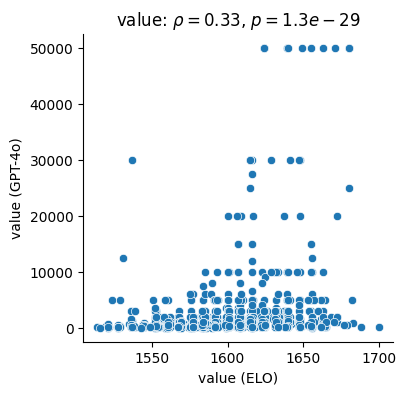

In [52]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT-4o)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [53]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['novelty_raw'].item())

3. Using the pen as a refrigerator.
This idea is extremely novel and surprising, as it is highly unconventional and imaginative.
{"novelty": 95}
